In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import sys
import statistics
import time
from tqdm import tqdm
sys.path.append(os.path.dirname(os.getcwd()))

from problems.problem_1.p1_b import stable_matching_1b
from problems.problem_1.p1_c import stable_matching_1c

In [2]:
def scramble_list(list_of_numbers):
  """Scramble the order of a list of numbers.

  Args:
    list_of_numbers: A list of numbers.

  Returns:
    A scrambled list of numbers.
  """

  random.shuffle(list_of_numbers)
  return list_of_numbers

def create_text_inputs(size):
    # Add in the n value at start of .txt
    lines = [str(size)]
    
    # Create the lines that are a list of the integers scrambled
    for _ in range(2*size):
        lines.append(" ".join(str(element) for element in scramble_list(list(range(size)))))
        
    # Write text input file    
    with open('input/test_p1c_student_n' + str(size) + '.txt', 'w') as f:
        for line in lines:
          f.write(line)
          f.write("\n")

In [3]:
## Get run times 
b_times = []
c_times = []

# List sizes
sizes = [int(i) for i in np.linspace(2, 1000, 10)]

# Get run times
for size in tqdm(sizes):
    
    b_times_single_size = []
    c_times_single_size = []
    
    for i in range(10-1):
        # create the text file that is being used
        create_text_inputs(size)

        # time b
        start_time = time.time()
        stable_matching_1b('input/test_p1c_student_n' + str(size) + '.txt') # run function
        b_times_single_size.append(time.time() - start_time)

        # time c
        start_time = time.time()
        stable_matching_1c('input/test_p1c_student_n' + str(size) + '.txt') # run function
        c_times_single_size.append(time.time() - start_time)
        
    
    b_times.append(statistics.median(b_times_single_size))
    c_times.append(statistics.median(c_times_single_size))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:49<00:00, 10.92s/it]


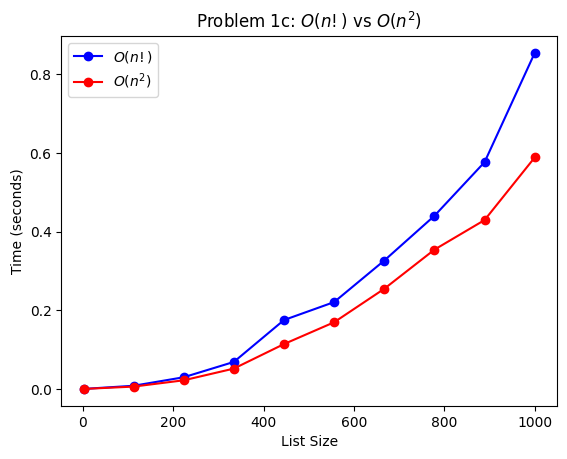

In [11]:
# Plotting
plt.plot(sizes, b_times, marker='o', label='$O(n!)$', color='blue')
plt.plot(sizes, c_times, marker='o', label='$O(n^2)$', color='red')
plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Problem 1c: $O(n!)$ vs $O(n^2)$')
plt.legend()
plt.savefig(os.path.dirname(os.getcwd()) + '/latex/figures/problem-1c.png')